In [194]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# Computing the CM 

## Basic approach:

In [189]:
# Random points in a sphere:

r = random.random(1000) 
theta = random.random(1000) * 2 - 1
phi = random.random(1000) * 2 * np.pi

x1 = r**(1/3.0) * sin(arccos(theta)) * sin(phi)
y1 = r**(1/3.0) * sin(arccos(theta)) * cos(phi)
z1 = r**(1/3.0) * theta

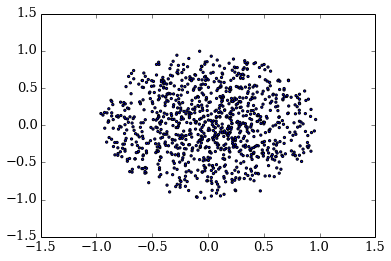

In [190]:
scatter(x1, z1, s=5)

In [191]:
# CM coordinates:
xCM = sum(x1)/len(x1)
yCM = sum(y1)/len(y1)
zCM = sum(z1)/len(z1)

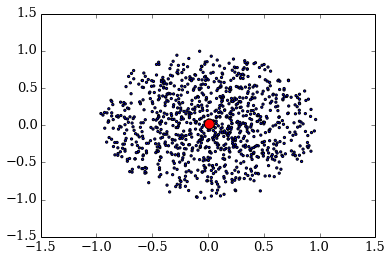

In [192]:
scatter(x1, z1, s=5)
scatter(xCM, zCM, s=100, c='r')

## Iterative approach:


In [201]:
def CM(x, y, z, xCM, yCM, zCM, delta):
    xCM = sum(x)/len(x)
    yCM = sum(y)/len(y)
    zCM = sum(z)/len(z)

    xCM_new = xCM
    yCM_new = yCM
    zCM_new = zCM

    xCM = 0.0
    yCM = 0.0
    zCM = 0.0

    while (np.sqrt((xCM_new-xCM)**2 + (yCM_new-yCM)**2 +(zCM_new-zCM)**2) > delta):
        xCM = xCM_new
        yCM = yCM_new
        zCM = zCM_new
        Rcm = np.sqrt(xCM**2 + yCM**2 + zCM**2)
        r = np.sqrt(x**2 + y**2 + z**2)
        R = np.sqrt((x - xCM)**2 + (y - yCM)**2 + (z - zCM)**2)
        Rmax = max(R)
        index = where(r<Rmax/2)
        x = x[index]
        y = y[index]
        z = z[index]
        #print Rmax
        xCM_new = sum(x)/len(x)
        yCM_new = sum(y)/len(y)
        zCM_new = sum(z)/len(z)
        scatter(xCM_new, yCM_new)
    return xCM_new, yCM_new, zCM_new

In [202]:
CM(x1, y1, z1, 0, 0, 0, 0.5)


(0.011688332355869234, -0.0077151028259065304, 0.015244647209741544)

# Testing the code in a simulation snapshot:

In [195]:
from pygadgetreader import *

In [196]:
positions = readsnap("../../../data/MW_models/snapshot_test_007", 'pos', 'dm')

Returning DM    Positions


In [199]:
x_sim = positions[:,0]
y_sim = positions[:,1]
z_sim = positions[:,2]

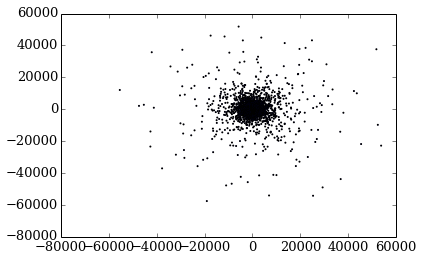

In [197]:
scatter(positions[:,0], positions[:,1], s=1.0)

In [205]:
X_simCM, Y_simCM, Z_simCM = CM(x_sim, y_sim, z_sim, 0, 0, 0, 1000)


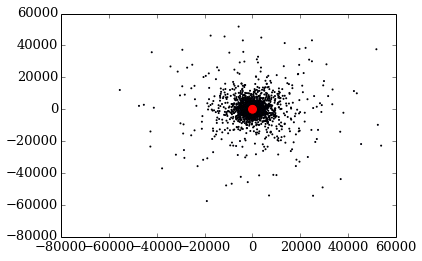

In [207]:
scatter(positions[:,0], positions[:,1], s=1.0)
scatter(X_simCM, Y_simCM, c='r', s=100)